# Symbolic regression without Parsimony Pressure

## Testing various bloat control method 
The following is the testing for the symbolic regression without the parsimony pressure.

In [1]:
#loading packages & dependencies
#When the %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib.
%pylab inline 
from gplearnmod.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


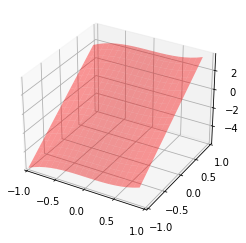

In [2]:
# Ground truth
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**3+ 4*x1 - 0.75 #true function

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, .5))
ax.set_yticks(np.arange(-1, 1.01, .5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='red', alpha=0.4)
plt.show()

In [3]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**3+ 4*X_train[:, 1] - 0.75

# Testing samples|
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**3+ 4*X_test[:, 1] - 0.75

In [4]:
est_gp = SymbolicRegressor(population_size=5000, #the number of programs in each generation
                           generations=50, stopping_criteria=0.01, #The required metric value required in order to stop evolution early.
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, #0.05, The probability of performing hoist mutation on a tournament winner. Hoist mutation takes the winner of a tournament and selects a random subtree from it. A random subtree of that subtree is then selected and this is ‘hoisted’ into the original subtrees location to form an offspring in the next generation. This method helps to control bloat.
                           p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          459.188       25         0.434331         0.506694      5.51m
   1    16.42          2.69846       51         0.240454         0.424414      2.64m
   2    19.39          2.58865       21         0.178287         0.169132      2.44m
   3    26.69          1.70211       25         0.163968          0.22371      2.56m
   4    30.55          1.64622       53         0.156344         0.154314      2.57m
   5    33.14          1.67733       51         0.129594         0.227946      2.61m
   6    34.20          1.87864       33         0.126483         0.215309      2.65m
   7    39.05          1.72592       55         0.117841         0.333721      2.53m
   8    42.90          2.10164       57         0.115443         0.355299  

SymbolicRegressor(generations=50, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0,
                  population_size=5000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [5]:
print(est_gp._program)

sub(add(add(add(div(X0, 0.946), add(X1, X1)), div(mul(-0.171, X0), div(X1, X1))), add(mul(add(X0, mul(sub(X1, X1), mul(X1, X1))), mul(X0, X0)), mul(-0.961, sub(add(sub(sub(X1, 0.279), mul(sub(div(mul(-0.171, X0), mul(X0, div(X1, X1))), div(mul(-0.171, X0), div(X1, X1))), 0.633)), mul(add(X0, mul(mul(X0, 0.946), add(mul(mul(X0, 0.956), mul(X0, X0)), mul(mul(mul(sub(X0, X0), add(X1, X1)), mul(sub(X1, 0.701), sub(0.733, X1))), sub(add(sub(sub(X1, 0.279), mul(-0.241, 0.633)), mul(sub(add(X1, X0), div(sub(div(mul(-0.171, X0), div(X1, X1)), mul(add(X0, mul(-0.315, 0.181)), X0)), mul(add(sub(add(X1, X1), add(X1, X1)), add(add(X1, X1), -0.735)), X1))), sub(X0, X0))), X1))))), sub(X0, X0))), X1)))), sub(add(0.922, X0), add(X1, X1)))


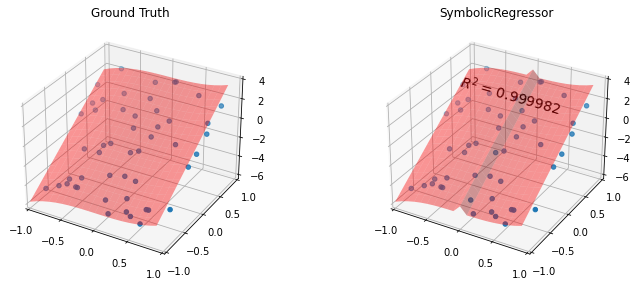

In [6]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
#y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_tree = est_tree.score(X_test, y_test)
#y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
#score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):
                                       #(y_tree, score_tree, "DecisionTreeRegressor"),
                                       #(y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.01, .5))
    ax.set_yticks(np.arange(-1, 1.01, .5))
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='red', alpha=0.4)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 0.1, .1, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()

In [7]:
sim = simplify(str(est_gp._program))
print(sim)

AttributeError: 'Tuple' object has no attribute 'expand'

## Conclusion

This is an interesting result. Without parsimony pressure the program ended early on at 18 gen with an respectable accuracy of 0.999982. However if we look at the program size during evolution we can see that the program size is very big compared to the ones iwth parsimony pressure.

(sympy problem) if we look at the last command where sympy try to simplifty the program estimated output but unable to parse due to the size increase